In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/content/gdrive/MyDrive'

Mounted at /content/gdrive
/content/gdrive/MyDrive/content/gdrive/MyDrive


<ipython-input-11-96e659a8a849>:17: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_file, header=None, na_values=' ?')


Failed to read .names file with encoding: utf-8
Successfully read .names file with encoding: latin1
Number of samples: 3279
Number of features: 1558
Number of labels: 1567
Classes: ['| "w:\\c4.5\\alladA" names file -- automatically generated!', '', 'ad, nonad | classes.', '', 'height: continuous.', 'width: continuous.', 'aratio: continuous.', 'local: 0,1.', '| 457 features from url terms', 'url*images+buttons: 0,1.', 'url*likesbooks.com: 0,1.', 'url*www.slake.com: 0,1.', 'url*hydrogeologist: 0,1.', 'url*oso: 0,1.', 'url*media: 0,1.', 'url*peace+images: 0,1.', 'url*blipverts: 0,1.', 'url*tkaine+kats: 0,1.', 'url*labyrinth: 0,1.', 'url*advertising+blipverts: 0,1.', 'url*images+oso: 0,1.', 'url*area51+corridor: 0,1.', 'url*ran+gifs: 0,1.', 'url*express-scripts.com: 0,1.', 'url*off: 0,1.', 'url*cnet: 0,1.', 'url*time+1998: 0,1.', 'url*josefina3: 0,1.', 'url*truluck.com: 0,1.', 'url*clawnext+gif: 0,1.', 'url*autopen.com: 0,1.', 'url*tvgen.com: 0,1.', 'url*pixs: 0,1.', 'url*heartland+5309: 0

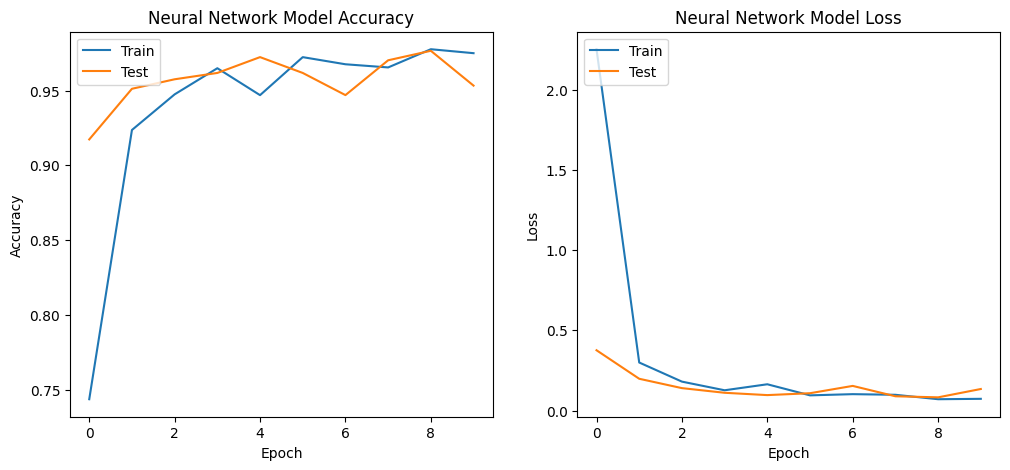

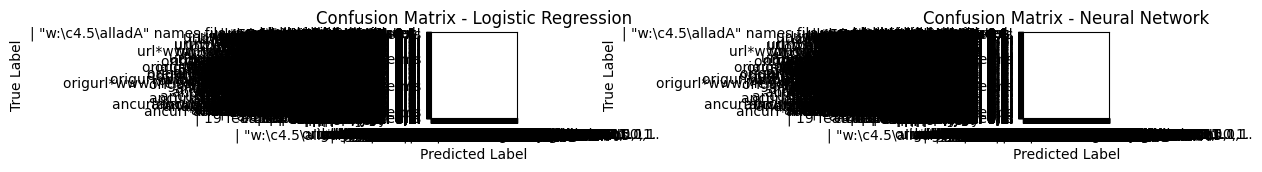

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.963983   0.963745  0.963983  0.962865
1       Neural Network  0.953390   0.956911  0.953390  0.954494


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Đọc dữ liệu từ các file
data_file = 'ad.data'
names_file = 'ad.names'

# Đọc file .data
data = pd.read_csv(data_file, header=None, na_values=' ?')

# Đọc file .names với các encoding khác nhau
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
for encoding in encodings:
    try:
        with open(names_file, 'r', encoding=encoding) as f:
            class_names = f.read().splitlines()
        print(f'Successfully read .names file with encoding: {encoding}')
        break
    except UnicodeDecodeError:
        print(f'Failed to read .names file with encoding: {encoding}')
        class_names = None

if class_names is None:
    raise ValueError('Failed to read .names file with all tested encodings.')

# Kiểm tra dữ liệu
print(f'Number of samples: {data.shape[0]}')
print(f'Number of features: {data.shape[1] - 1}')
print(f'Number of labels: {len(class_names)}')
print(f'Classes: {class_names}')

# Giả sử cột cuối cùng là nhãn và các cột còn lại là đặc trưng
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Xử lý các giá trị thiếu (thay thế các giá trị thiếu với NaN và loại bỏ chúng)
X.replace(' ?', np.nan, inplace=True)

# Chuyển đổi tất cả các cột không phải nhãn thành dạng số nếu cần thiết
X = X.apply(pd.to_numeric, errors='coerce')

# Loại bỏ các hàng có giá trị thiếu
X.dropna(inplace=True)
y = y[X.index]

# Chuyển đổi nhãn thành số nếu cần thiết
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Trích xuất các độ đo
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

# Neural Network
# Reshape data for Neural Network
X_train_nn = X_train.values
X_test_nn = X_test.values

# Xây dựng mô hình Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train_nn, y_train, epochs=10, validation_data=(X_test_nn, y_test))

# Đánh giá mô hình
loss, accuracy_nn = model.evaluate(X_test_nn, y_test)
y_pred_nn = np.argmax(model.predict(X_test_nn), axis=1)

# Trích xuất các độ đo
precision_nn = precision_score(y_test, y_pred_nn, average='weighted')
recall_nn = recall_score(y_test, y_pred_nn, average='weighted')
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

# Hiển thị các độ đo
print(f"Logistic Regression - Accuracy: {accuracy_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}, F1-score: {f1_log_reg}")
print(f"Neural Network - Accuracy: {accuracy_nn}, Precision: {precision_nn}, Recall: {recall_nn}, F1-score: {f1_nn}")

# Vẽ biểu đồ kết quả huấn luyện của Neural Network
plt.figure(figsize=(12, 5))

# Biểu đồ độ chính xác huấn luyện và kiểm tra
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Neural Network Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Biểu đồ loss huấn luyện và kiểm tra
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Neural Network Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Hiển thị confusion matrix cho cả hai mô hình
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix cho Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
ax[0].imshow(cm_log_reg, interpolation='nearest', cmap=plt.cm.Blues)
ax[0].set_title('Confusion Matrix - Logistic Regression')
ax[0].set_xticks(np.arange(len(class_names)))
ax[0].set_yticks(np.arange(len(class_names)))
ax[0].set_xticklabels(class_names)
ax[0].set_yticklabels(class_names)
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Confusion matrix cho Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
ax[1].imshow(cm_nn, interpolation='nearest', cmap=plt.cm.Blues)
ax[1].set_title('Confusion Matrix - Neural Network')
ax[1].set_xticks(np.arange(len(class_names)))
ax[1].set_yticks(np.arange(len(class_names)))
ax[1].set_xticklabels(class_names)
ax[1].set_yticklabels(class_names)
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Bảng tóm tắt các độ đo
metrics = {
    'Model': ['Logistic Regression', 'Neural Network'],
    'Accuracy': [accuracy_log_reg, accuracy_nn],
    'Precision': [precision_log_reg, precision_nn],
    'Recall': [recall_log_reg, recall_nn],
    'F1-score': [f1_log_reg, f1_nn]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)
